<a href="https://colab.research.google.com/github/Abidah15/My_Notes-GColab/blob/main/1stRegression_Project_CO2Emissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# # Predicting the Value of CO2 Emissionn


Now that you have been equipped with the skills over the course of 'Data Science and Analytics', now you have a chance to practice and apply it on a dataset.

### In this project, you need to build a model to predict the unknown value. ###


#### Thinking like a data scientist, you have to follow the data science methodology, as shown in the image below:

### 1- Business Understanding

Data science methodology begins with spending the time to seek clarification. What is the problem that you are trying to solve?

Our problem here is finding the value of the CO2 Emission.

Main Goal: Predict the value of CO2 emission based on single independent variable.

Main Object: Building a predictive model.

### 2- Analytic Approach

How can you use data to answer the question/solve the problem?

Selecting the right analytic approach to solve the problem. In this project the problem is about predicting the CO2 Emission. So we are going to use Simple Linear Regression algorithm to solve the problem.

### 3- Data Requirements

Necessary data content, Data Formats, Sources for initial data collection.

In thin project we need to collect data about the CO2 emission, engine size, and Fuel consumption.



### 4- Data Collection

After the initial data collection is performed, an assessment by the data scientist takes place to determine whether or not they have what they need.

### 5- Data Understanding

Data understanding encompasses all activities related to constructing the data set.

In [ ]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2024-07-23 07:22:16--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.04s   

2024-07-23 07:22:16 (1.66 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [ ]:
import pandas as pd

df = pd.read_csv('/content/FuelConsumption.csv')

df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [ ]:
ndf = df[['MODELYEAR', 'ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']]

ndf.corr()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


In [ ]:
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [ ]:
df.describe(include='all')

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067,1067,1067,1067.000000,1067.000000,1067,1067,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
unique,NaN,39,663,16,NaN,NaN,22,4,NaN,NaN,NaN,NaN,NaN
top,NaN,FORD,F150 FFV,MID-SIZE,NaN,NaN,A6,X,NaN,NaN,NaN,NaN,NaN
freq,NaN,90,8,178,NaN,NaN,222,514,NaN,NaN,NaN,NaN,NaN
mean,2014.0,NaN,NaN,NaN,3.346298,5.794752,NaN,NaN,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,NaN,NaN,NaN,1.415895,1.797447,NaN,NaN,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,NaN,NaN,NaN,1.000000,3.000000,NaN,NaN,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,NaN,NaN,NaN,2.000000,4.000000,NaN,NaN,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,NaN,NaN,NaN,3.400000,6.000000,NaN,NaN,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,NaN,NaN,NaN,4.300000,8.000000,NaN,NaN,15.550000,10.850000,13.350000,31.000000,294.000000


### 6- Data Preparation

Together with data collection and data understanding, data preparation is the most time-consuming phase of a data science project, typically taking 70% and even up to even 90% of the overall project time.

In [ ]:
df.numeric = df.select_dtypes(include=['number']) #select numerical features from the data

df.numeric.corr()

<ipython-input-50-4eb680c5544c>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.numeric = df.select_dtypes(include=['number']) #select numerical features from the data


,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


<Axes: xlabel='ENGINESIZE', ylabel='CO2EMISSIONS'>

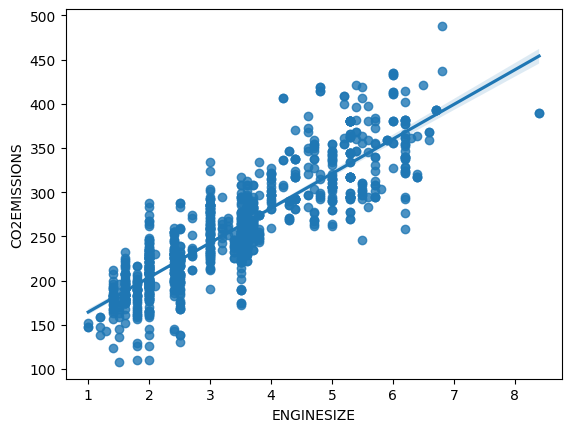

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.regplot(x = 'ENGINESIZE', y = 'CO2EMISSIONS', data=df)

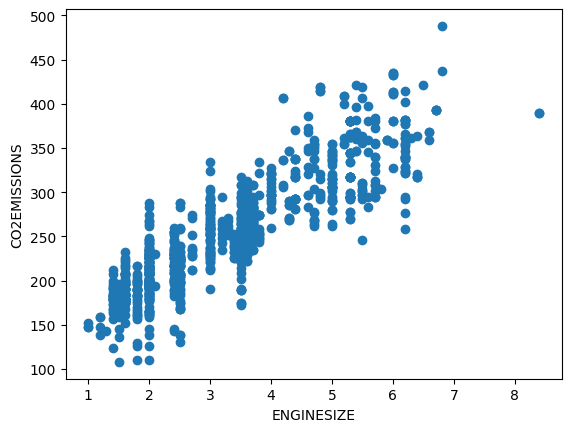

In [ ]:
plt.scatter(df.ENGINESIZE, df.CO2EMISSIONS)
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

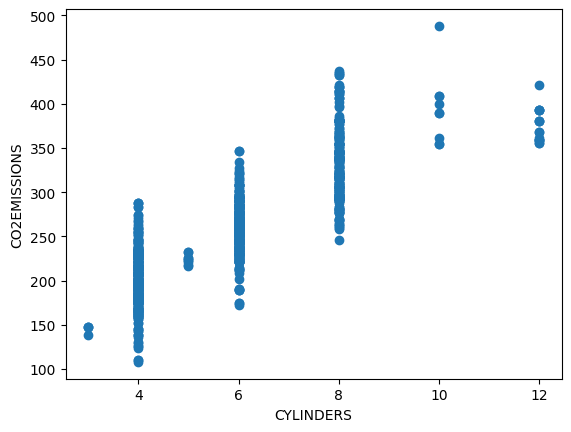

In [ ]:
plt.scatter(df.CYLINDERS, df.CO2EMISSIONS)
plt.xlabel('CYLINDERS')
plt.ylabel('CO2EMISSIONS')
plt.show()

<Axes: xlabel='CYLINDERS', ylabel='CO2EMISSIONS'>

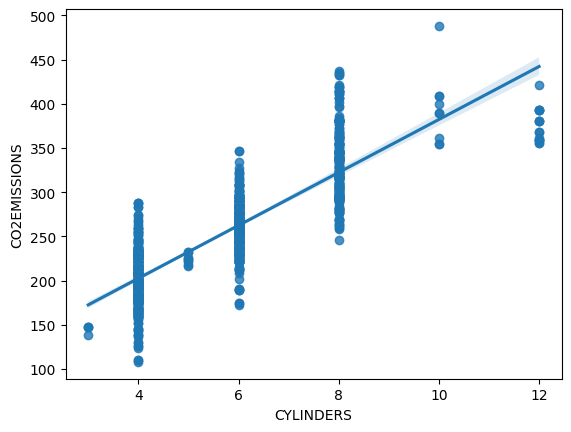

In [ ]:
sns.regplot(x = 'CYLINDERS', y = 'CO2EMISSIONS', data=df)

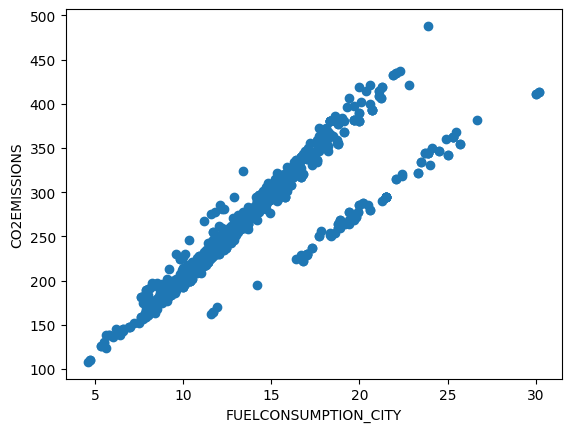

In [ ]:
plt.scatter(df.FUELCONSUMPTION_CITY, df.CO2EMISSIONS)
plt.xlabel('FUELCONSUMPTION_CITY')
plt.ylabel('CO2EMISSIONS')
plt.show()

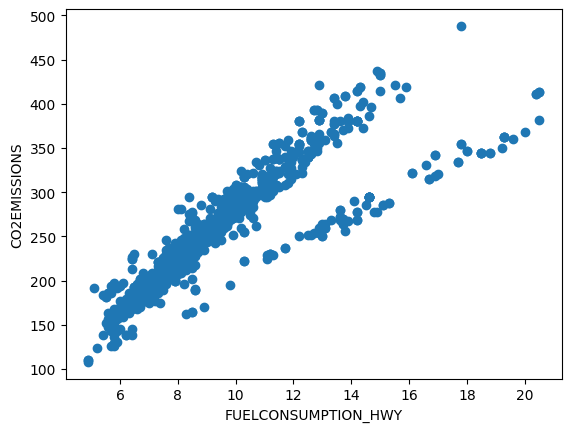

In [ ]:
plt.scatter(df.FUELCONSUMPTION_HWY, df.CO2EMISSIONS)
plt.xlabel('FUELCONSUMPTION_HWY')
plt.ylabel('CO2EMISSIONS')
plt.show()

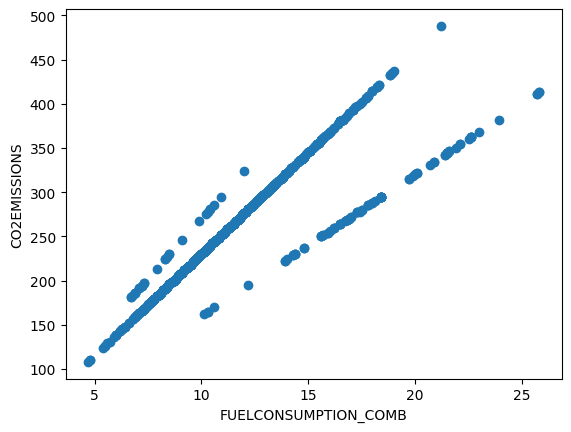

In [ ]:
plt.scatter(df.FUELCONSUMPTION_COMB, df.CO2EMISSIONS)
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('CO2EMISSIONS')
plt.show()

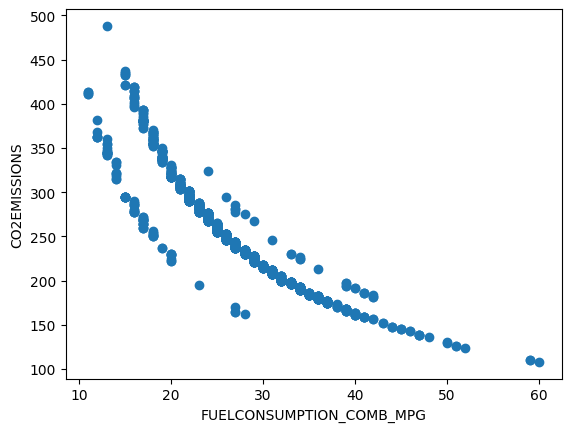

In [ ]:
plt.scatter(df.FUELCONSUMPTION_COMB_MPG, df.CO2EMISSIONS)
plt.xlabel('FUELCONSUMPTION_COMB_MPG')
plt.ylabel('CO2EMISSIONS')
plt.show()

#### Creating train and test dataset

Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

This means that we know the outcome of each data point in this dataset, making it great to test with! And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Lets split our dataset into train and test sets, 80% of the entire data for training, and the 20% for testing. We create a mask to select random rows using *np.random.rand()* function:

In [ ]:
import numpy as np

msk = np.random.rand(len(df)) <= 0.8
train = df[msk] #80% randomnly chosen from the data
test = df[~msk] #20% leftover of the data

**Train and Test Dataset Distribution**

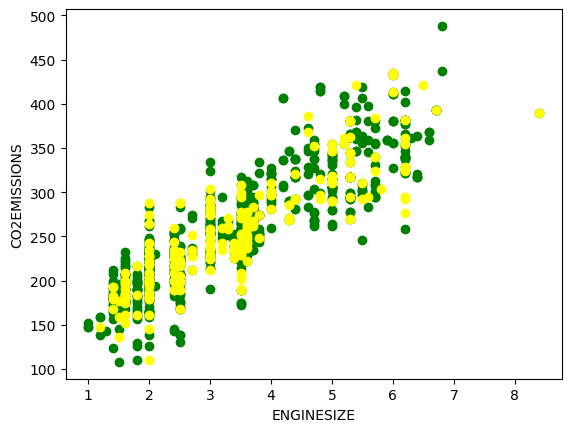

In [ ]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='green')
plt.scatter(test.ENGINESIZE, test.CO2EMISSIONS, color='yellow')

plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

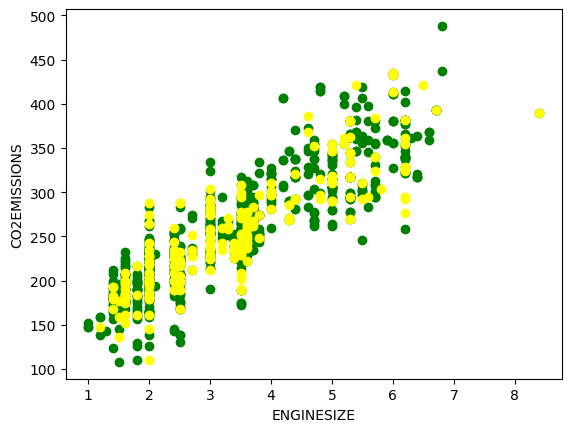

In [ ]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='green')
plt.scatter(test.ENGINESIZE, test.CO2EMISSIONS, color='yellow')

plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

### 7- Modelling

In [ ]:
from sklearn import linear_model

regr = linear_model.LinearRegression() #linearRegression is the algorithm from the sklearn

train_x = np.asanyarray(train[['ENGINESIZE']]) #under the variable of train_x
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#training
regr.fit(train_x, train_y)

LinearRegression()

In [ ]:
print ('The value of the slope is: ', regr.coef_)
print ('The value of the intercept is: ', regr.intercept_)

#value mungkin akan lain dengan orang lain, sebab dia randomnly chose

The value of the slope is:  [[39.32793617]]
The value of the intercept is:  [125.06610586]


Text(0, 0.5, 'Emission')

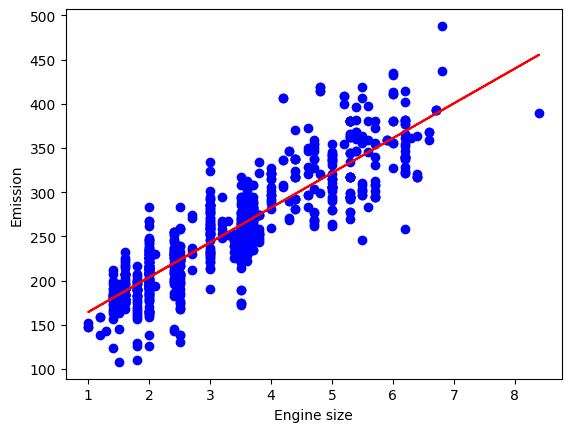

In [ ]:
#to see the best fitted line

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
#-r is for the colour of the line, can be change to -g, you will see green
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [ ]:
x = 2.4

y = regr.intercept_ + regr.coef_ *x

y

array([[219.45315266]])

In [ ]:
x = int(df['ENGINESIZE'].sample()) #going to chose other random number

y = regr.intercept_ + regr.coef_ *x

y

<ipython-input-66-ab81fe812f4a>:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  x = int(df['ENGINESIZE'].sample()) #going to chose other random number


array([[203.72197819]])

### 8- Evaluation

In [ ]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_y_ = regr.predict(test_x) #prediction based on the engine-size

print ('The R2 is: ', round(((r2_score(test_y, test_y_))*100), 2))
#multiplies by 100 to get the percentage, rounded by 2
print ('The MSE is: ', np.mean((test_y_ - test_y)**2))

The R2 is:  75.09
The MSE is:  988.9006964698683


In [ ]:
regrG = linear_model.LinearRegression()

train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#training
regr.fit(train_x, train_y)

#prediction

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_y_ = regr.predict(test_x) #prediction based on the engine-size

#evaluation

print ('The R2 is: ', round(((r2_score(test_y, test_y_))*100), 2))
#multiplies by 100 to get the percentage, rounded by 2
print ('The MSE is: ', round(((np.mean((test_y_ - test_y)**2))*100),2))
print('The MAE is:', round(((np.mean(np.absolute(test_y_ - test_y)))*100),2))

The R2 is:  75.09
The MSE is:  98890.07
The MAE is: 2378.64


In [ ]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

#training the model
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree=2)
#default degree is 2, but the higher the degree, the more senstive it will be
train_x_poly = poly.fit_transform(train_x)

clf = linear_model.LinearRegression()

train_y_ = clf.fit(train_x_poly, train_y)

#predicting

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_x_poly = poly.fit_transform(test_x)

test_y_ = clf.predict(test_x_poly)

#evaluation

from sklearn.metrics import r2_score
print('The R2 Score is: ', r2_score(test_y, test_y_)*100)
print ('The MSE is:', np.mean((test_y_ - test_y)**2))

The R2 Score is:  75.41041702988254
The MSE is: 976.2668966921264


Text(0, 0.5, 'CO2EMISSIONS')

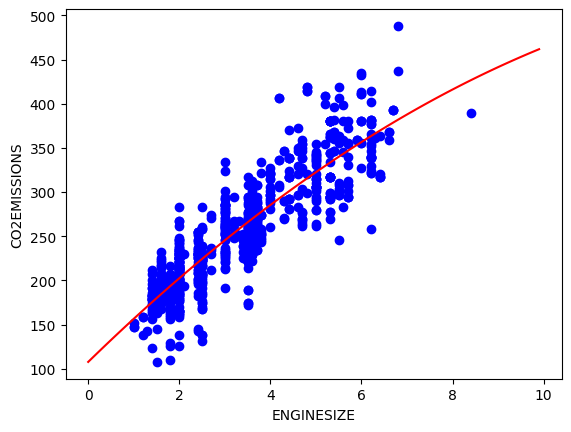

In [ ]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")

**Trying to check the other correlated features**

In [ ]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [ ]:
#FUELCONSUMPTION_COMB_MPG vs CO2EMISSIONS

regr1 = linear_model.LinearRegression() #linearRegression is the algorithm from the sklearn

train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB_MPG']]) #under the variable of train_x
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#training
regr1.fit(train_x, train_y)

#prediction

test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB_MPG']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_y_ = regr1.predict(test_x) #prediction based on the fuelconsumption test dataset

#evaluation

print ('The R2 is: ', round(((r2_score(test_y, test_y_))*100), 2))
#multiplies by 100 to get the percentage, rounded by 2
print ('The MSE is: ', round(((np.mean((test_y_ - test_y)**2))*100),2))
print('The MAE is:', round(((np.mean(np.absolute(test_y_ - test_y)))*100),2))

The R2 is:  82.2
The MSE is:  70665.29
The MAE is: 1732.87


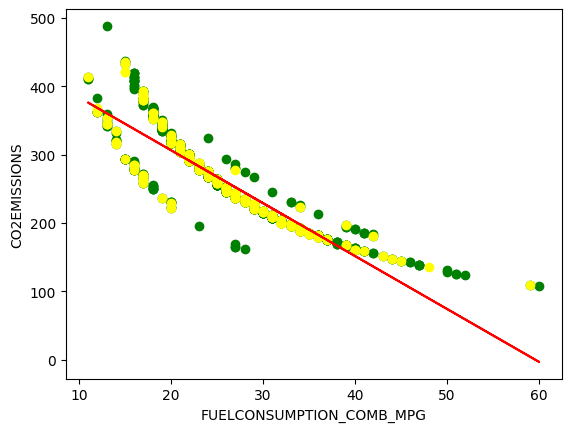

In [ ]:
plt.scatter(train.FUELCONSUMPTION_COMB_MPG, train.CO2EMISSIONS, color='green')
plt.scatter(test.FUELCONSUMPTION_COMB_MPG, test.CO2EMISSIONS, color='yellow')
plt.plot(train_x, regr1.coef_[0][0]*train_x + regr1.intercept_[0], '-r')

plt.xlabel('FUELCONSUMPTION_COMB_MPG')
plt.ylabel('CO2EMISSIONS')
plt.show()

In [ ]:
#Testing non-linear model to fuelconsumption

from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

#training the model
train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB_MPG']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree=4) #default degree is 2, but the higher the degree, the more senstive it will be
train_x_poly = poly.fit_transform(train_x)

clf = linear_model.LinearRegression()

train_y_ = clf.fit(train_x_poly, train_y)

#predicting

test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB_MPG']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_x_poly = poly.fit_transform(test_x)

test_y_ = clf.predict(test_x_poly)

#evaluation

from sklearn.metrics import r2_score
print('The R2 Score is: ', r2_score(test_y, test_y_)*100)
print ('The MSE is:', np.mean((test_y_ - test_y)**2))

The R2 Score is:  85.17846397594904
The MSE is: 588.4514184724162


Text(0, 0.5, 'CO2EMISSIONS')

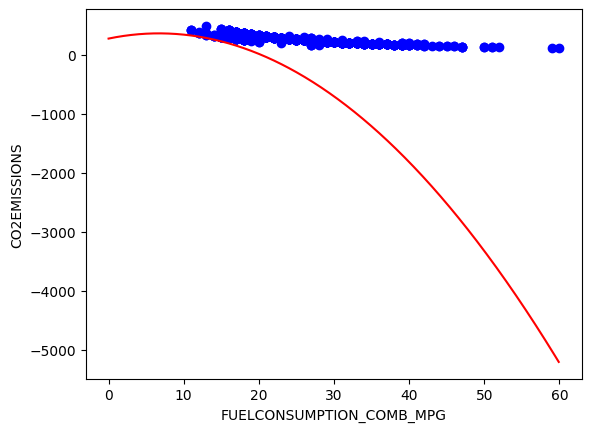

In [ ]:
plt.scatter(train['FUELCONSUMPTION_COMB_MPG'], train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 60.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("FUELCONSUMPTION_COMB_MPG")
plt.ylabel("CO2EMISSIONS")

In [ ]:
#CYLINDERS vs CO2EMISSIONS

regr2 = linear_model.LinearRegression() #linearRegression is the algorithm from the sklearn

train_x = np.asanyarray(train[['CYLINDERS']]) #under the variable of train_x
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#training
regr2.fit(train_x, train_y)

#prediction

test_x = np.asanyarray(test[['CYLINDERS']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_y_ = regr2.predict(test_x) #prediction based on the cylinder

#evaluation

print ('The R2 is: ', round(((r2_score(test_y, test_y_))*100), 2))
#multiplies by 100 to get the percentage, rounded by 2
print ('The MSE is: ', round((((np.mean((test_y_ - test_y)**2)))*100),2))
print('The MAE is:', round(((np.mean(np.absolute(test_y_ - test_y)))*100),2))

The R2 is:  71.71
The MSE is:  112302.66
The MAE is: 2594.87


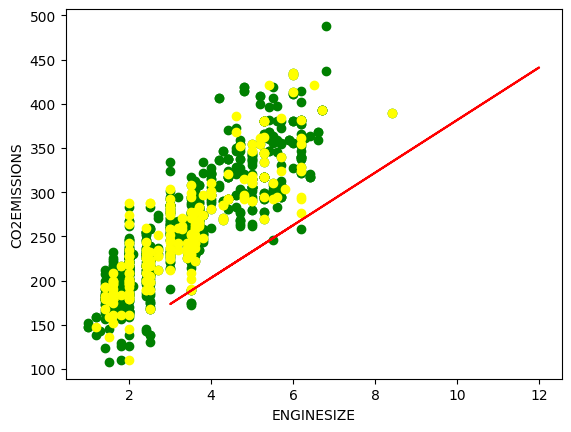

In [ ]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='green')
plt.scatter(test.ENGINESIZE, test.CO2EMISSIONS, color='yellow')
plt.plot(train_x, regr2.coef_[0][0]*train_x + regr2.intercept_[0], '-r')

plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

# **Multiple Linear Regression**

In [ ]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [ ]:
#Modeling for FUELCONSUMPTION_HWY & FUELCONSUMPTION_COMB with CO2EMISSIONS
#try all codes in 1 (training, prediction & evaluation)

regr3 = linear_model.LinearRegression() #linearRegression is the algorithm from the SK-Learn

train_x = np.asanyarray(train[['FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB']])
#under the variable of train_x
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#training
regr3.fit(train_x, train_y)

#prediction

test_x = np.asanyarray(test[['FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_y_ = regr3.predict(test_x) #prediction based on fuelconsumption highway & combination

#evaluation

print ('The R2 is: ', round(((r2_score(test_y, test_y_))*100), 2))
#multiplies by 100 to get the percentage, rounded by 2
print ('The MSE is: ', round((((np.mean((test_y_ - test_y)**2)))*100),2))
print('The MAE is:', round(((np.mean(np.absolute(test_y_ - test_y)))*100),2))

The R2 is:  79.54
The MSE is:  81236.56
The MAE is: 1940.19


In [ ]:
#Modeling for FUELCONSUMPTION_HWY & FUELCONSUMPTION_COMB with CO2EMISSIONS
#try all codes in 1 (training, prediction & evaluation)

from sklearn import linear_model

regr7 = linear_model.LinearRegression()

#Data is in Dataframe format but machine learning works with array, so changing it in array format and store it in new variable
train_x = np.asanyarray(train[['FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#training

regr7.fit(train_x, train_y)

#prediction

test_x = np.asanyarray(test[['FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_y_ = regr7.predict(test_x)

#evaluation

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('The R2 is:', round(((r2_score(test_y, test_y_))*100),2))
print('The MSE is:', round(((np.mean((test_y - test_y_)**2)))*100,2))
print('The MAE is:', round(((np.mean(np.absolute(test_y - test_y_))))*100, 2))
print('The RMSE is:', np.sqrt(mean_squared_error(test_y, test_y_)))

The R2 is: 79.54
The MSE is: 81236.56
The MAE is: 1940.19
The RMSE is: 28.502028530629346
